## Conversion Rate Data

### Data Load

In [1]:
import pandas as pd

wd = '/Users/ewenwang/Documents/practice_data/conversion_rate/'
data = 'round1_ijcai_18_train_20180301.txt'

data = pd.read_csv(wd+data, sep=' ')

In [2]:
data.head()

,instance_id,item_id,item_category_list,item_property_list,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,...,context_page_id,predict_category_property,shop_id,shop_review_num_level,shop_review_positive_rate,shop_star_level,shop_score_service,shop_score_delivery,shop_score_description,is_trade
0,108641074714126964,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,4006,5799347067982556520:-1;509660095530134768:-1;5...,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0
1,5754713551599725161,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,4001,5799347067982556520:9172976955054793469;790838...,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0
2,842679481291040981,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,4001,5799347067982556520:5131280576272319091;725801...,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0
3,937088850059189027,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,4016,509660095530134768:-1;5799347067982556520:-1;7...,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0
4,7975697065017708072,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,4001,5799347067982556520:9172976955054793469;790838...,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0


In [3]:
edgelist = pd.DataFrame()
edgelist['source'] = data.instance_id
edgelist['target'] = data.item_id

edgelist.to_csv(wd+'edgelist_cvr.txt', index=False)

In [4]:
edgelist.head()

,source,target
0,108641074714126964,3412720377098676069
1,5754713551599725161,3412720377098676069
2,842679481291040981,3412720377098676069
3,937088850059189027,3412720377098676069
4,7975697065017708072,3412720377098676069


In [60]:
data.shape

(478138, 27)

In [72]:
all_edges = data.iloc[:,:2]

In [73]:
all_edges.head()

,instance_id,item_id
0,108641074714126964,3412720377098676069
1,5754713551599725161,3412720377098676069
2,842679481291040981,3412720377098676069
3,937088850059189027,3412720377098676069
4,7975697065017708072,3412720377098676069


In [85]:
all_edges_list = all_edges.values.tolist()

In [90]:
all_edges_list[1][0]

5754713551599725161

### Graph Analysis: User-Item Graph

In [7]:
import networkx as nx

In [8]:
G = nx.from_pandas_edgelist(df=data, source='user_id', target='item_id', edge_attr=False)

In [9]:
import GraphicML

GA = GraphicML.Attribute(G)

Note: More than one connected components included.


In [11]:
# pd = GA.mulTabular()
# pd.head()

In [ ]:
len(graphs)

In [14]:
graphs[0].number_of_edges()

443556

## Largest Connected Component Analysis

In [12]:
import matplotlib.pyplot as plt

In [13]:
graphs = list(nx.connected_component_subgraphs(G))
largest = graphs[0]

In [14]:
import community

In [15]:
partition = community.best_partition(largest)

In [16]:
type(partition)

dict

In [17]:
size = float(len(set(partition.values())))
size

39.0

In [18]:
node_lists = []
for ccomp in set(partition.values()):
    node_list = [nodes for nodes in partition.keys() if partition[nodes] == ccomp]
    node_lists.append(node_list)
    print('num of ', ccomp, len(node_list))

num of  0 5033
num of  1 24839
num of  2 10429
num of  3 33771
num of  4 773
num of  5 25071
num of  6 27433
num of  7 2460
num of  8 22041
num of  9 9337
num of  10 7530
num of  11 15216
num of  12 7764
num of  13 5676
num of  14 2355
num of  15 1205
num of  16 1352
num of  17 2755
num of  18 1159
num of  19 38
num of  20 5
num of  21 4
num of  22 133
num of  23 26
num of  24 9
num of  25 19
num of  26 6
num of  27 13
num of  28 28
num of  29 7
num of  30 7
num of  31 7
num of  32 6
num of  33 6
num of  34 4
num of  35 4
num of  36 5
num of  37 5
num of  38 6


In [29]:
len(node_lists)

39

In [19]:
edge_list = largest.edges()

In [31]:
def foo_0(node_list_id):
    sub_egde_list = []
    for i in [*edge_list.keys()]:
        if set(i).intersection(node_lists[node_list_id]):
            sub_egde_list.append(i)
    print('len_of_list', len(sub_egde_list))
    return sub_egde_list

In [32]:
sub_0 = foo_0(0)

len_of_list 14181


In [33]:
sub_0[0]

(963235454279221249, 6021779006619514714)

In [41]:
import csv
import os

def ReadCSVasList(csv_file):
    with open(csv_file) as csvfile:
            reader = csv.reader(csvfile, dialect='excel', quoting=csv.QUOTE_NONNUMERIC)
            datalist = []
            datalist = list(reader)
            return datalist  
    return 

def WriteListToCSV(csv_file,csv_columns,data_list):
    with open(csv_file, 'w') as csvfile:
        writer = csv.writer(csvfile, dialect='excel', quoting=csv.QUOTE_NONNUMERIC)
        writer.writerow(csv_columns)
        for data in data_list:
            writer.writerow(data)
    return              

csv_columns = ['source', 'target']

csv_file = wd + "edgelist_cvr.csv"

WriteListToCSV(csv_file,csv_columns,sub_0)

In [22]:
sub_graph = nx.Graph()
sub_graph.add_edges_from(sub_egde_list)

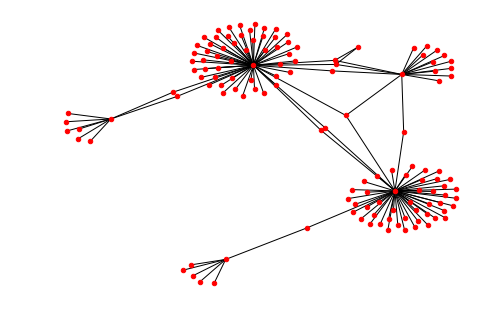

In [23]:
nx.draw_spring(sub_graph, node_size=20)

In [24]:
def foo(node_list_id):
    sub_egde_list = []
    for i in [*edge_list.keys()]:
        if set(i).intersection(node_lists[node_list_id]):
            sub_egde_list.append(i)
    sub_graph = nx.Graph()
    sub_graph.add_edges_from(sub_egde_list)
    nx.draw_spring(sub_graph, node_size=20)
    return None

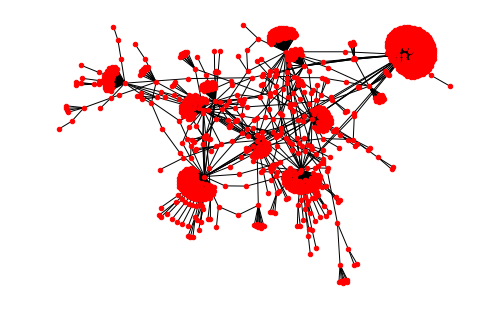

In [25]:
foo(4)

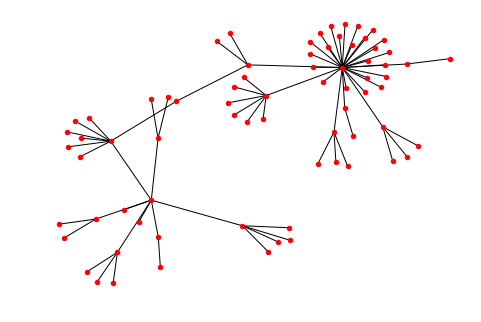

In [30]:
foo(19)

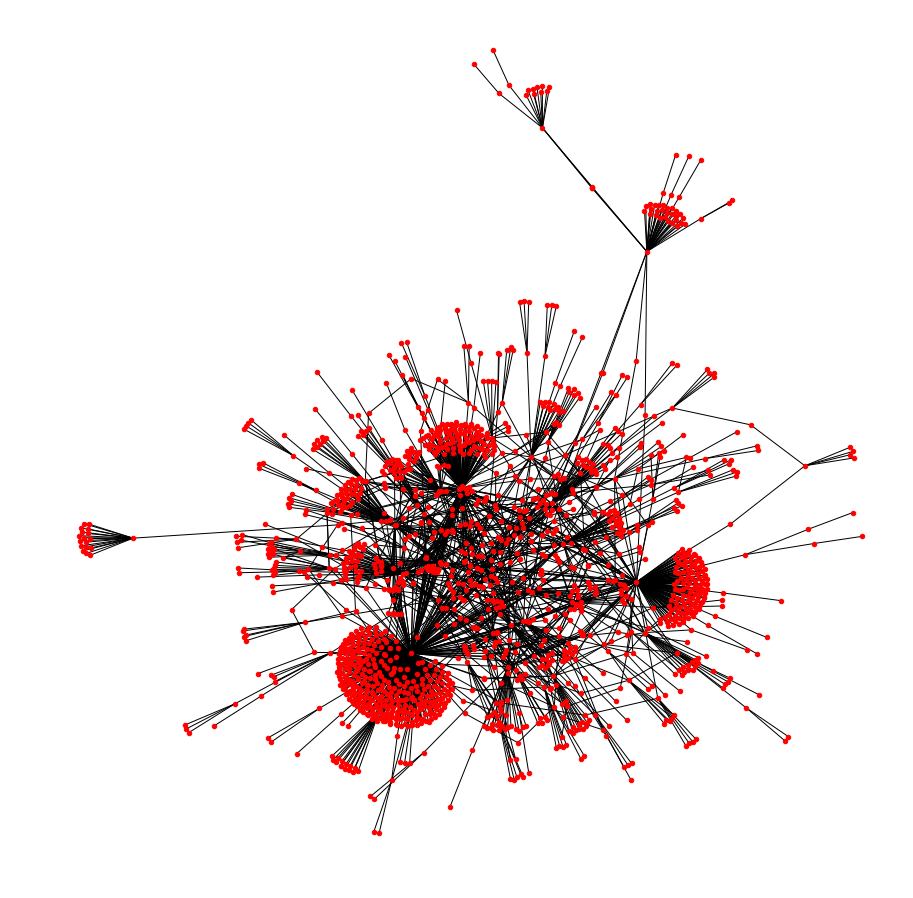

In [133]:
plt.figure(figsize=(12,12))
foo(18)

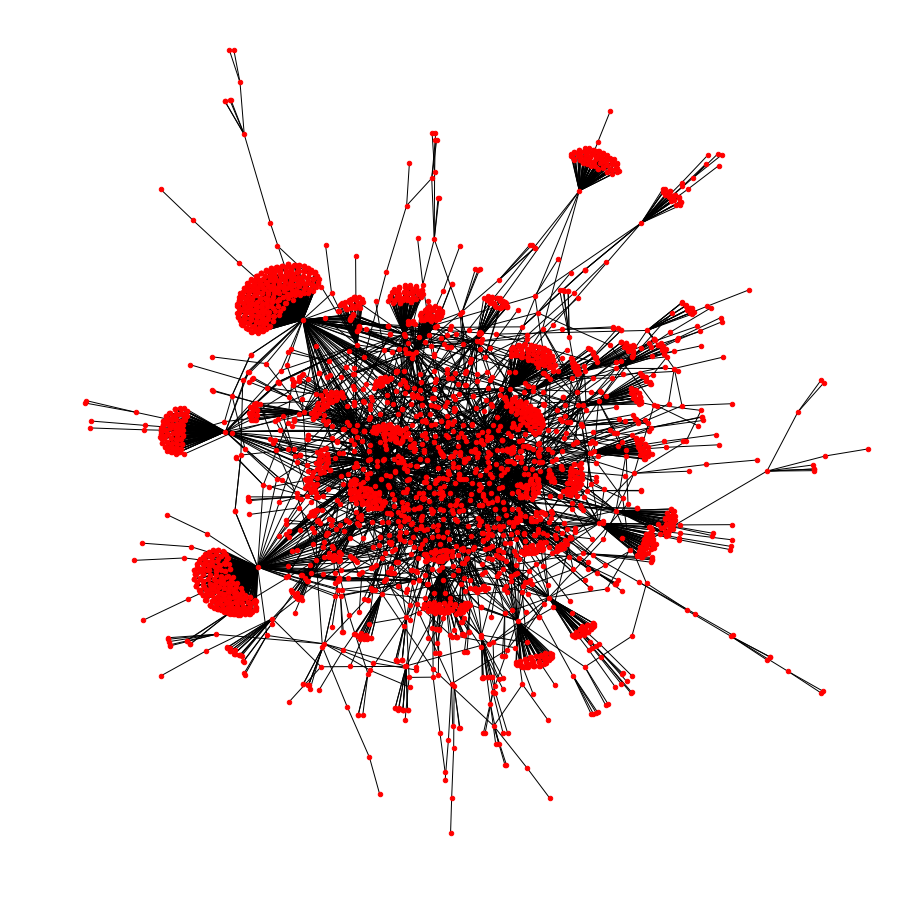

In [135]:
plt.figure(figsize=(12,12))
foo(14)

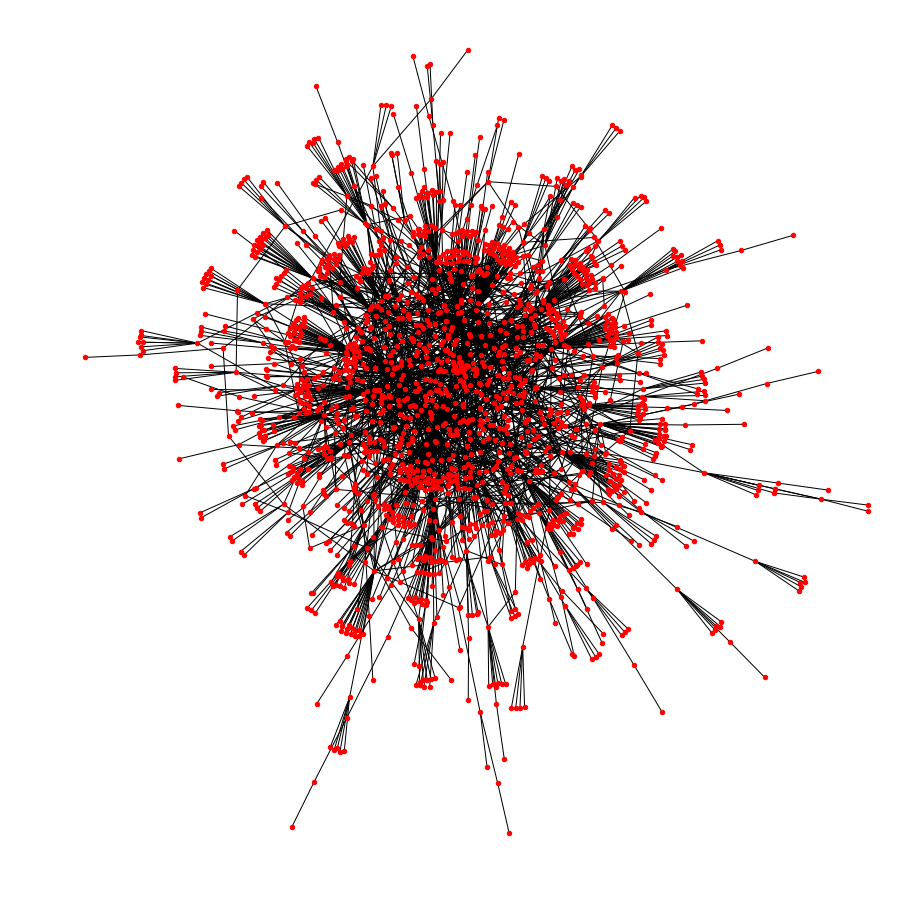

In [136]:
plt.figure(figsize=(12,12))
foo(16)

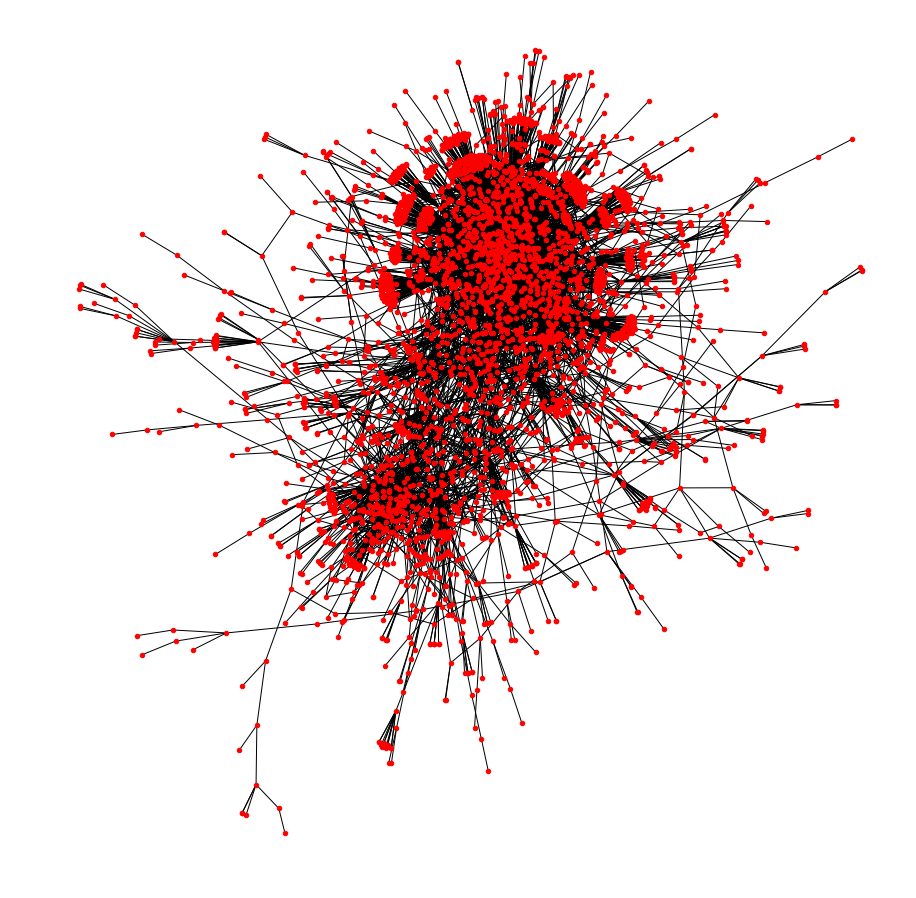

In [137]:
plt.figure(figsize=(12,12))
foo(17)

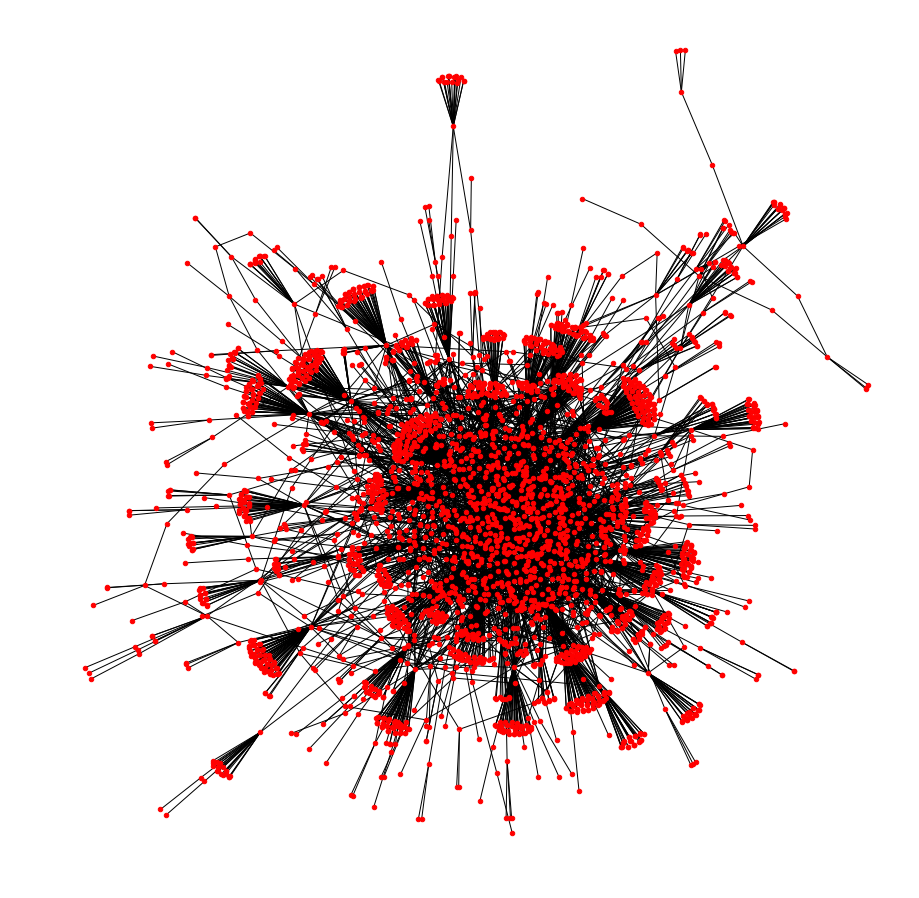

In [138]:
plt.figure(figsize=(12,12))
foo(7)

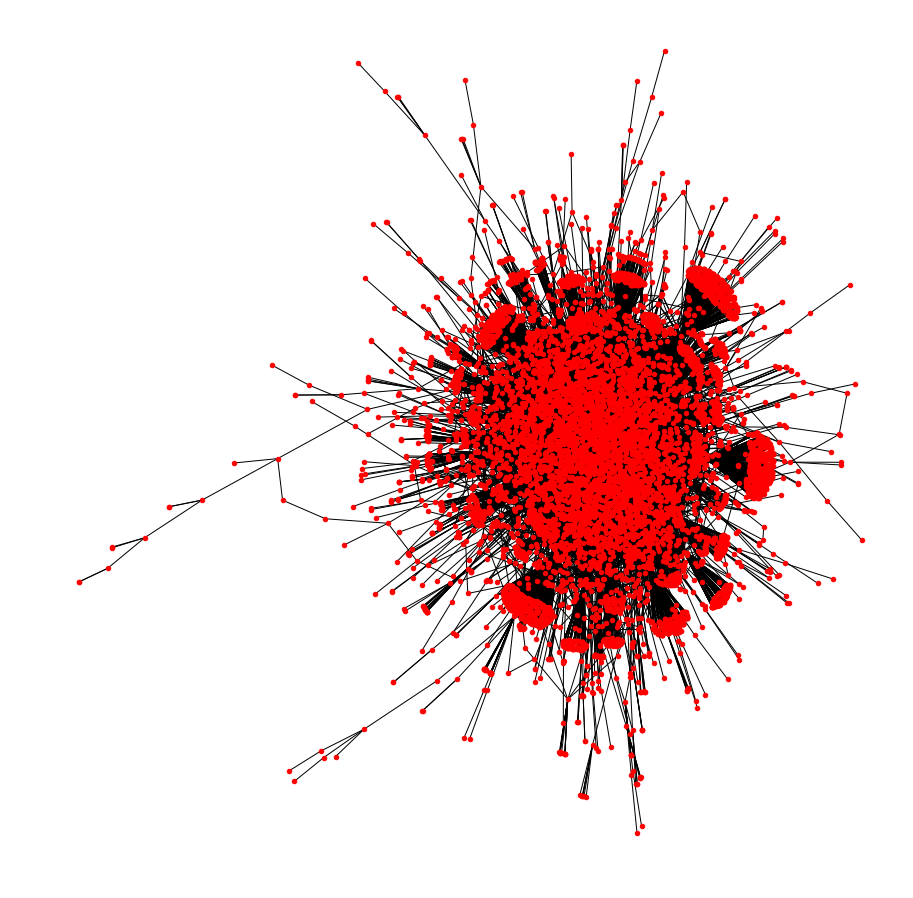

In [139]:
plt.figure(figsize=(12,12))
foo(0)

In [ ]:
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, nodelist = node_lists[19], node_size = 20)

In [13]:
from networkx.algorithms.community.centrality import girvan_newman

In [14]:
comp = girvan_newman(G)

In [15]:
import itertools

k = 200
limited = itertools.takewhile(lambda c: len(c) <= k, comp)

In [18]:
# for communities in limited:
#     print(tuple(sorted(c) for c in communities)) 

In [43]:
edges_count = []

for ind, graph in enumerate(graphs):
    edges_count.append(graph.number_of_edges())

edges_count = pd.DataFrame(edges_count, columns=['edges_count'])

In [44]:
edges_count.head()

,edges_count
0,443556
1,1
2,2
3,1
4,3


In [45]:
edges_count[edges_count.edges_count==11]

,edges_count
161,11


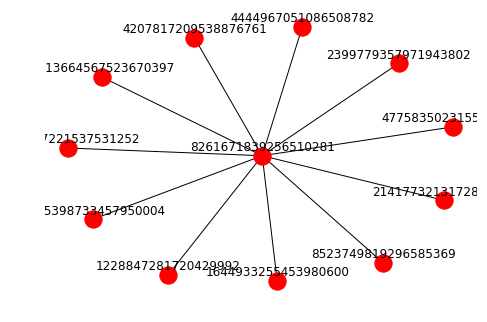

In [47]:
import matplotlib.pyplot as plt

pos = nx.spring_layout(graphs[161])
nx.draw(graphs[161], pos, font_size=16, with_labels=False)
for p in pos:  # raise text positions
    pos[p][1] += 0.07
nx.draw_networkx_labels(graphs[161], pos)
plt.figure(figsize=(16,9))
plt.show()

### Graph Analysis: Item-Shop Graph

In [51]:
G_is = nx.from_pandas_edgelist(df=data, source='shop_id', target='item_id', edge_attr=False)

In [52]:
graphs_is = list(nx.connected_component_subgraphs(G_IS))

In [53]:
len(graphs_is)

3959

In [55]:
edges_count_is = []

for ind, graph in enumerate(graphs_is):
    edges_count_is.append(graph.number_of_edges())

edges_count_is = pd.DataFrame(edges_count_is, columns=['edges_count'])

In [58]:
edges_count_is.sort_values(by='edges_count', ascending=False).head()

,edges_count
1305,67
1284,47
979,42
705,39
352,38


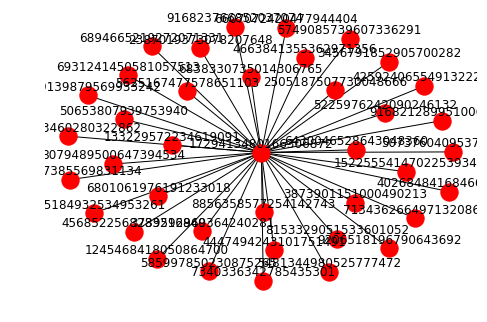

In [59]:
pos = nx.spring_layout(graphs_is[352])
nx.draw(graphs_is[352], pos, font_size=16, with_labels=False)
for p in pos:  # raise text positions
    pos[p][1] += 0.07
nx.draw_networkx_labels(graphs_is[352], pos)
plt.figure(figsize=(16,9))
plt.show()

In [72]:
def PlotGraph(graph):
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, font_size=16, with_labels=False)
    for p in pos:  # raise text positions
        pos[p][1] += 0.07
    nx.draw_networkx_labels(graph, pos)
    plt.figure(figsize=(16,9))
    plt.show()

In [66]:
G_uis = nx.compose_all([G,G_is])

In [67]:
graphs_uis = list(nx.connected_component_subgraphs(G_uis))

In [68]:
edges_count_uis = []

for ind, graph in enumerate(graphs_uis):
    edges_count_uis.append(graph.number_of_edges())

edges_count_uis = pd.DataFrame(edges_count_uis, columns=['edges_count'])

In [76]:
edges_count_uis.sort_values(by='edges_count', ascending=False).head(10)

,edges_count
0,454039
37,8
3,8
73,5
18,4
8,4
101,4
17,4
39,3
40,3


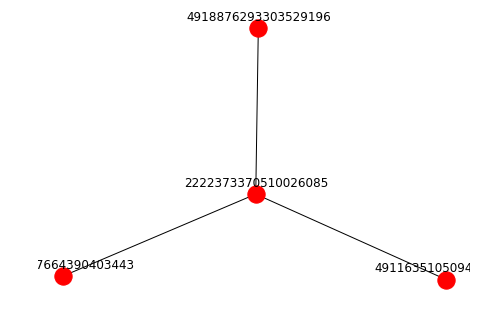

In [77]:
PlotGraph(graphs_uis[40])

In [78]:
graphs_uis[0].number_of_nodes()

211307

In [ ]:
# nx.ego_graph(graphs_uis[0], n='8811056487516803043', radius=10)

In [84]:
data.user_id[:10]

0    4505772604969228686
1    2692638157208937547
2    5247924392014515924
3    2681414445369714628
4    2729475788342039013
5    4512655448325954611
6    8811056487516803043
7    6507704883896466138
8    6203308008480593423
9    6041712044514783312
Name: user_id, dtype: int64

In [88]:
import graphicML

In [ ]:
GA = graphicML.Attribute(G_is)
df = GA.graph_attributes()
df.head()

In [ ]:
G_uis